<a href="https://colab.research.google.com/github/gnatnib/crop_yield_prediction/blob/main/crop_yield_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Yield Prediction - Regresi Interpolasi**
**Anggota Kelompok:**


*   Bintang Syafrian Rizal - 24060122120031
*   Awang Pratama Mulya    - 24060122120039
*   Irfan Mursyid



In [1]:
#import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# **Data Cleaning**

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.duplicated().sum()

2310

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(25932, 7)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091327   
hg/ha_yield                    0.091327     1.000000   
average_rain_fall_mm_per_year -0.006423    -0.004067   
pesticides_tonnes              0.135127     0.065523   
avg_temp                       0.013701    -0.110400   

                               average_rain_fall_mm_per_year  \
Year                                               -0.006423   
hg/ha_yield                                        -0.004067   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.161483   
avg_temp                                            0.333694   

                               pesticides_tonnes  avg_temp  
Year                                    0.135127  0.013701  
hg/ha_yield                             0.065523 -0.110400  
average_rain_fall_mm_per_year           0.161483  0.333694  
pesticides_tonnes                 

# **Data Visualization**

In [14]:
len(df['Area'].unique())

101

C:\Users\binta\AppData\Local\Temp\ipykernel_23920\1620373258.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(g1.get_xticklabels(), rotation=90)


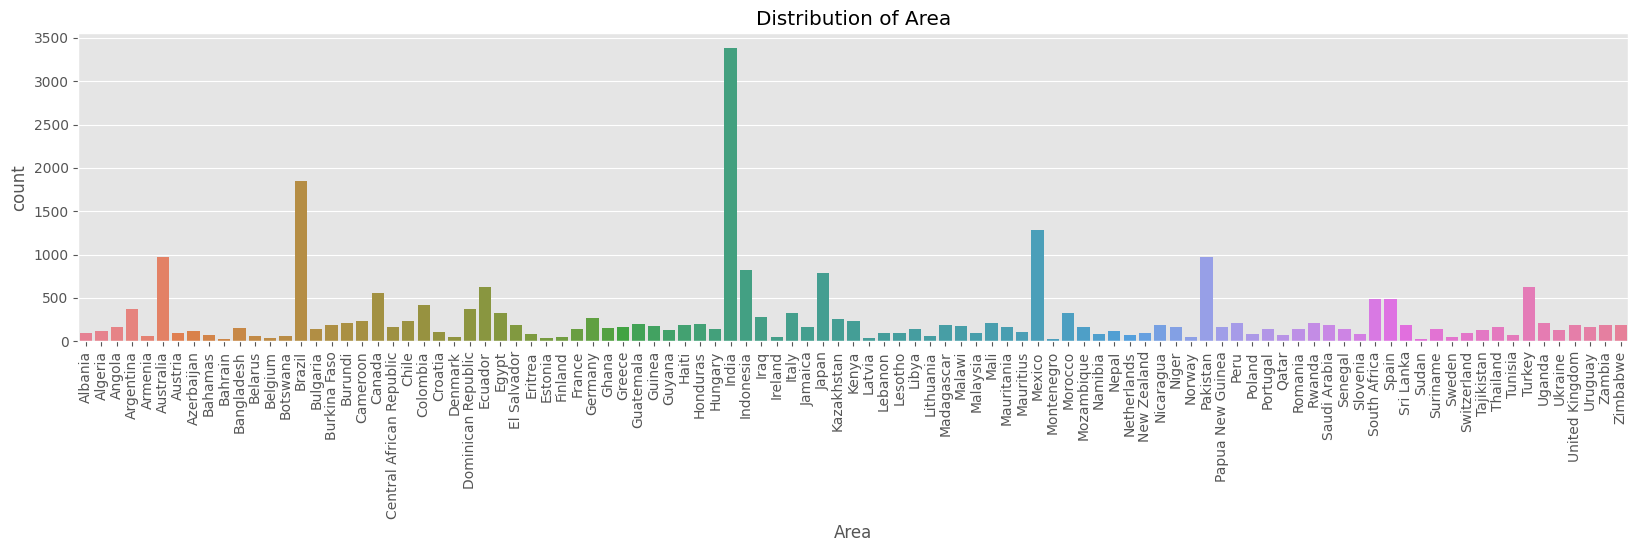

In [67]:
plt.figure(figsize=(20,4))
g1 = sns.countplot(x=df['Area'], hue=df['Area'], legend=False)
g1.set_title('Distribution of Area')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
plt.show()

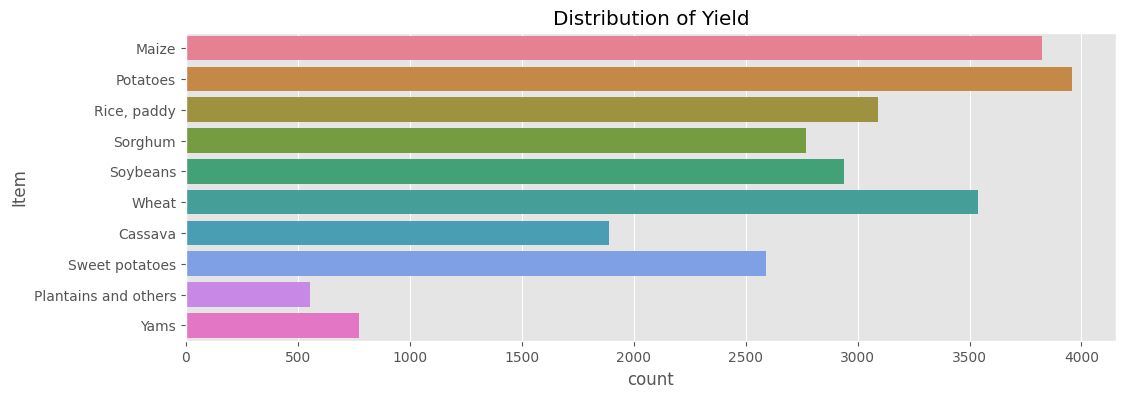

In [69]:
plt.figure(figsize=(12,4))
g2 = sns.countplot(y=df['Item'], hue=df['Item'], legend=False)
g2.set_title('Distribution of Yield')
plt.show()

Text(0.5, 1.0, 'Distribution of Average Temperature')

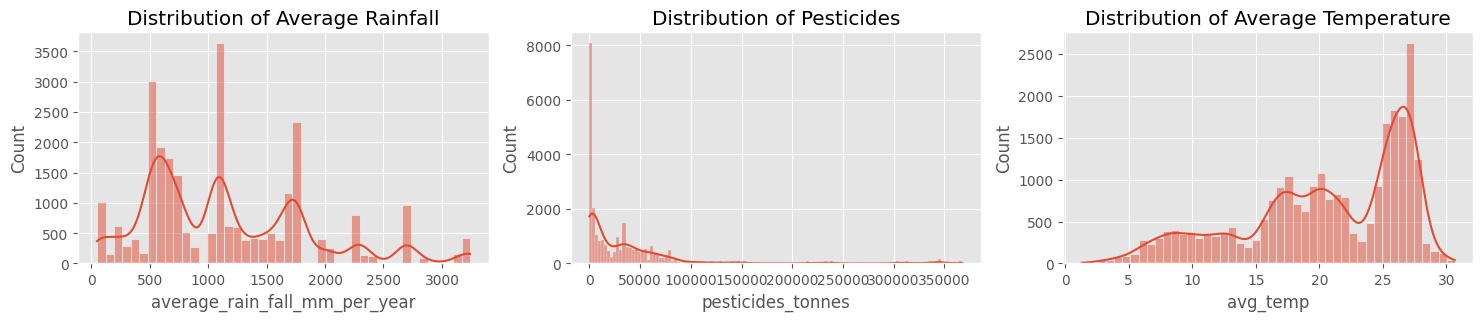

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

g1=sns.histplot(df["average_rain_fall_mm_per_year"], kde=True, ax=axes[0]) 
g1.set_title('Distribution of Average Rainfall')

g2=sns.histplot(df["pesticides_tonnes"], kde=True, ax=axes[1], label='Data') 
g2.set_title('Distribution of Pesticides')

g3=sns.histplot(df["avg_temp"], kde=True, ax=axes[2], label='Data') 
g3.set_title('Distribution of Average Temperature')



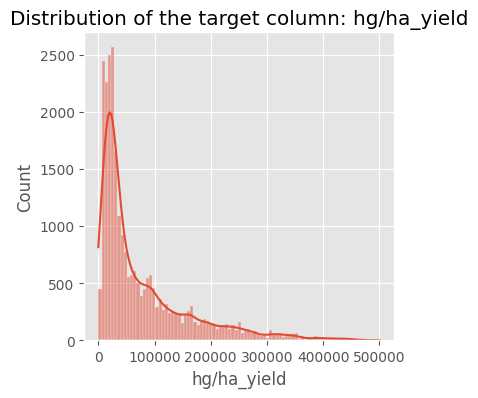

In [74]:
plt.figure(figsize=(4,4))
g = sns.histplot(df['hg/ha_yield'], kde=True, label='Data')
g.set_title('Distribution of the target column: hg/ha_yield')

plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Tiap Variabel')

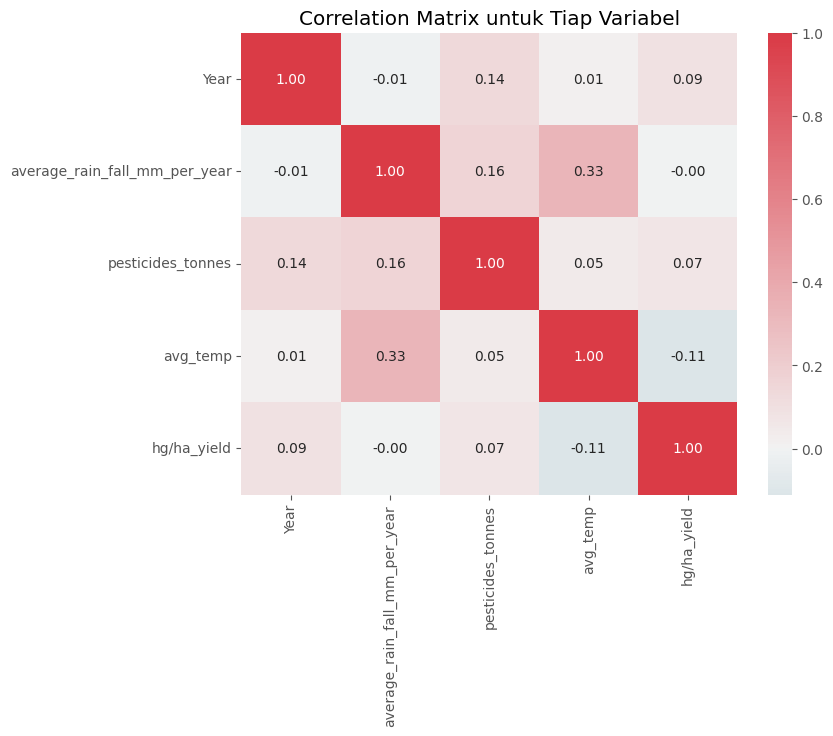

In [77]:
# Correlation Matrix
corr_matrix = df.drop(['Area', 'Item'], axis=1).corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt = ".2f", center=0, annot_kws={"size": 10}).set_title('Correlation Matrix untuk Tiap Variabel')

In [17]:
(df['Area'].value_counts() < 400).sum()

88

In [18]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [19]:
df['hg/ha_yield'].sum()

1996196943

In [20]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

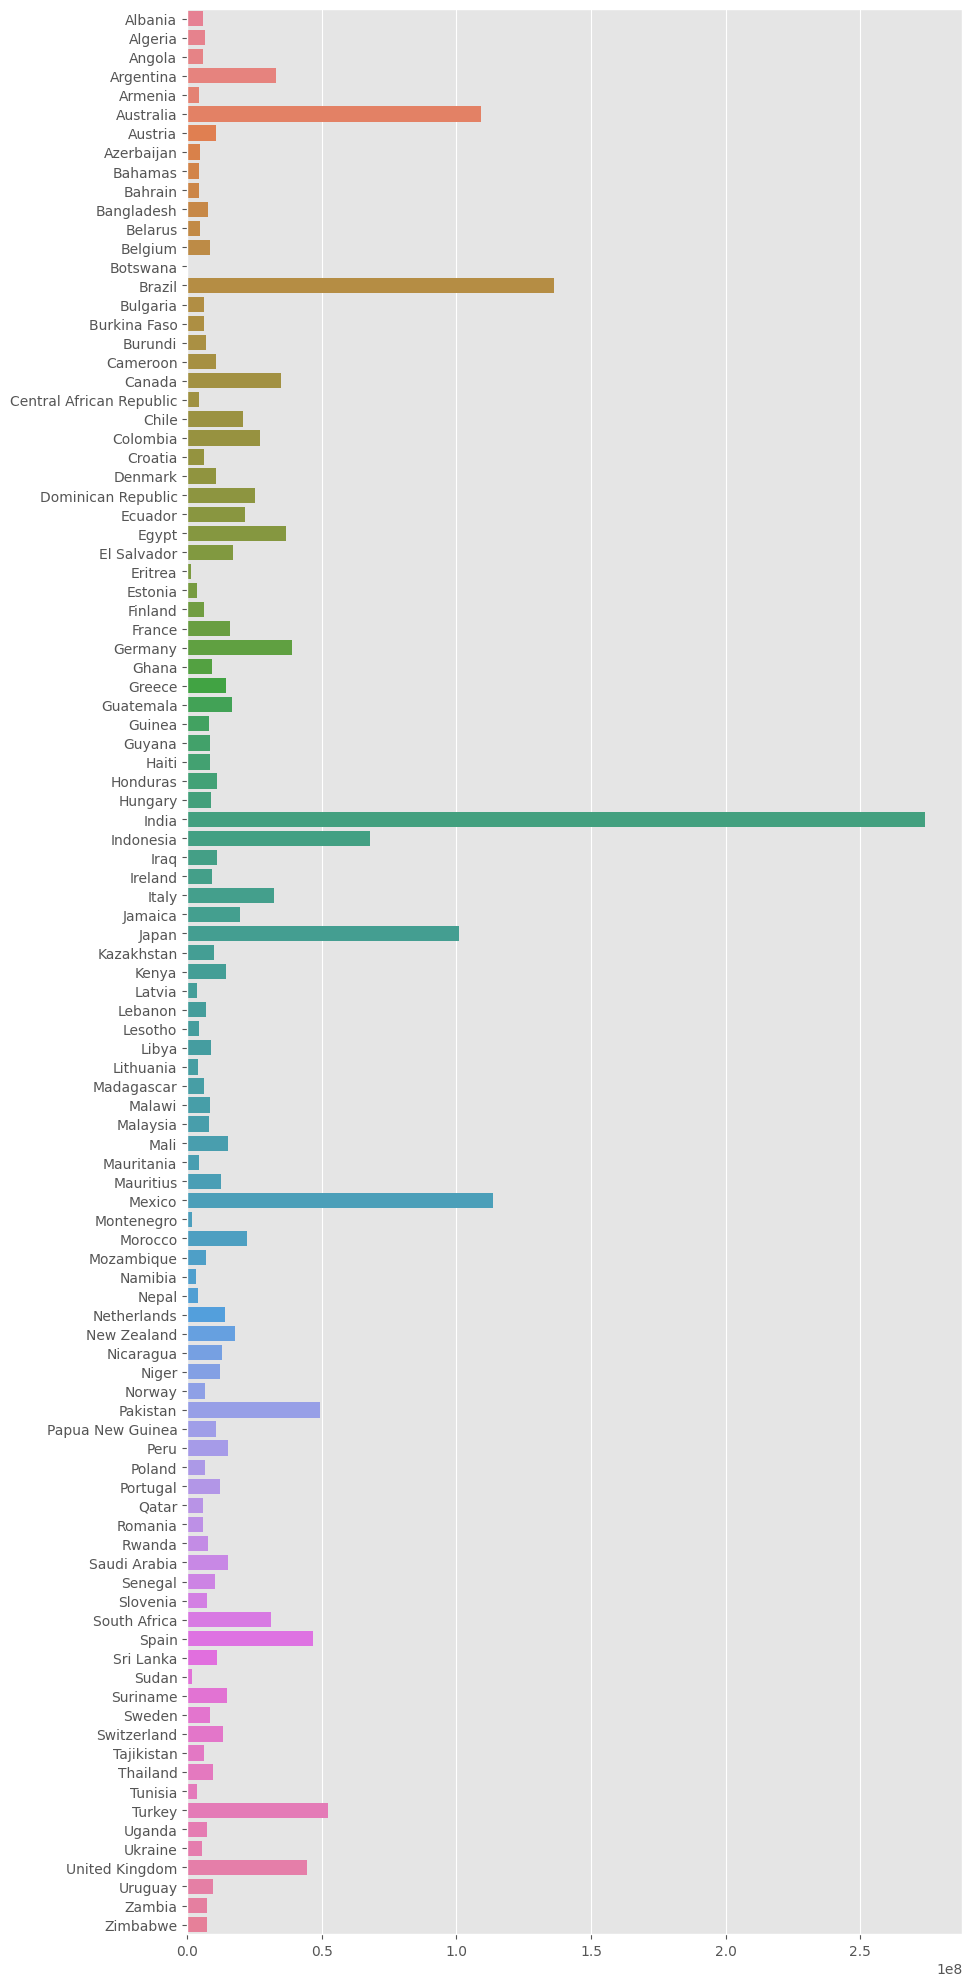

In [21]:
plt.figure(figsize=(10,25))
sns.barplot(y=country, x=yield_per_country, hue=country, dodge=False)
plt.show()

In [22]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

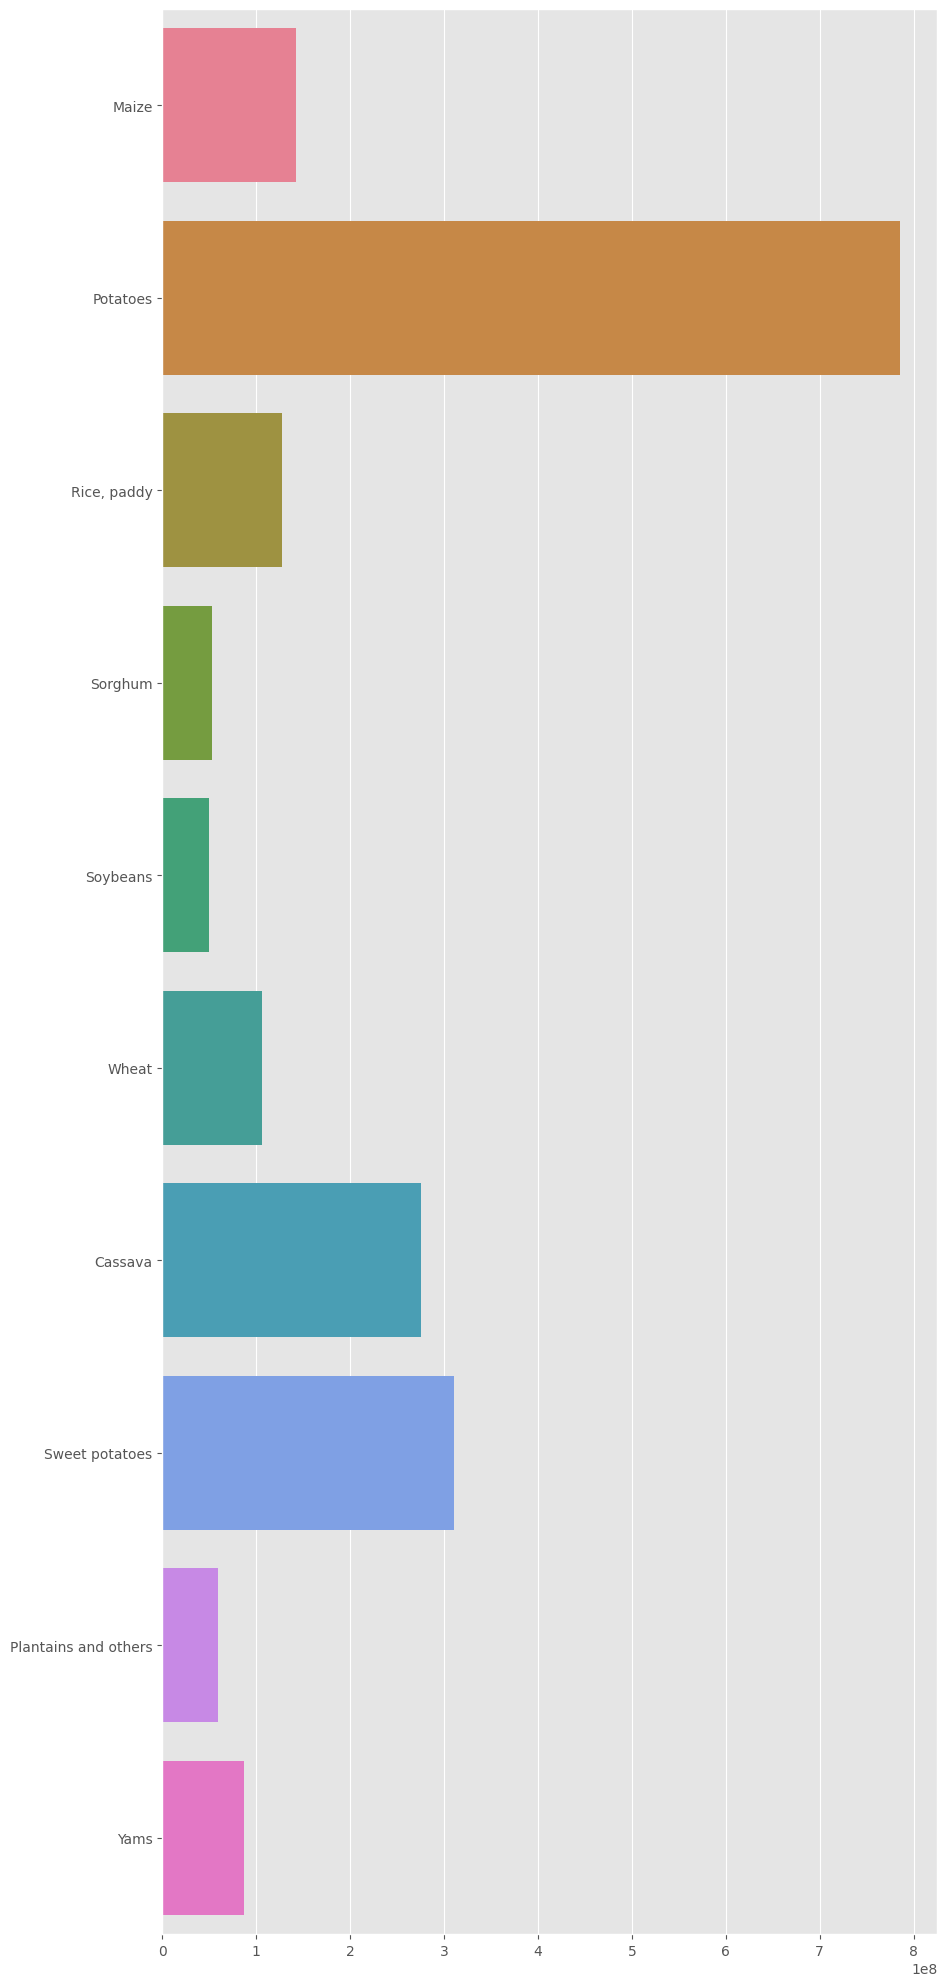

In [23]:
plt.figure(figsize=(10,25))
sns.barplot(y=crops, x=yield_per_crop, hue=crops, dodge=False)
plt.show()

# **Building the Model**

In [24]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [25]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [26]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

In [27]:
df = df[col]

In [28]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [29]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [30]:
X.shape

(25932, 6)

In [31]:
y.shape

(25932,)

In [32]:
# Sample 2000 rows from X and y
X_sampled = X.sample(n=2000, random_state=0)
y_sampled = y[X_sampled.index]

# Split the sampled data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ohe = OneHotEncoder(drop='first')
scale = StandardScaler()
numeric_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
categorical_features = ['Area', 'Item']
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', StandardScaler(), numeric_features),
        ('OneHotEncode', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ],
    remainder='passthrough'
)

In [34]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

c:\Users\binta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
preprocessor.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

# **Training the Model**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [37]:
models = {
    'LinearRegression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'KNN' : KNeighborsRegressor()
}

for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_predict = md.predict(X_test_dummy)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_predict)}, R2: {r2_score(y_test, y_predict)}")

LinearRegression - MAE: 29907.458164642376, R2: 0.7473059628026477
Decision Tree - MAE: 3948.9828417196836, R2: 0.9791316464579853
KNN - MAE: 4614.869365721997, R2: 0.9849292754875121


In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 79048.])

In [39]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [40]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


# **Prediction**

In [41]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    input_data = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })
    
    # Transform the features
    transform_features = preprocessor.transform(input_data)
    
    # Make prediction
    predicted_yield = dtr.predict(transform_features)
    
    return predicted_yield[0]

In [42]:
result = prediction(2025,2898.0,1597.0,27.57,'Indonesia','Potatoes')

In [43]:
result

160184.0